# Algorithme de Wilson pour la génération d'arbres couvrants

Sujet proposé par Laurent Massoulié

Abderrahim Mama and Augustin Ribadeau Dumas

## Partie 1 : Partie théorique

$T1.$ On considère un cycle suppressible $C$ et un cycle directement suppressible $C'$.

Comme le cycle $C'$ est directement suppressible, tous ses éléments sont au sommet d'une pile chacun. En supprimant $C'$, on fait monter les éléments $C$ dans les différentes piles et un nouveau cycle se retrouve directement suppressible. On peut donc supprimer ce cycle et on itère jusqu'à ce que les éléments de $C$ arrivent tous au sommet de leur pile. On le supprime alors.
On a donc trouvé une séquence de cycles commençant par $C'$ qui permet de supprimer $C$ (voire la figure ci-dessous).

Pour afficher les figures, veillez télécharger les figures au format .png jointes dans le mail. La ligne de code ci-dessous devrait normalement pouvoir l'afficher.

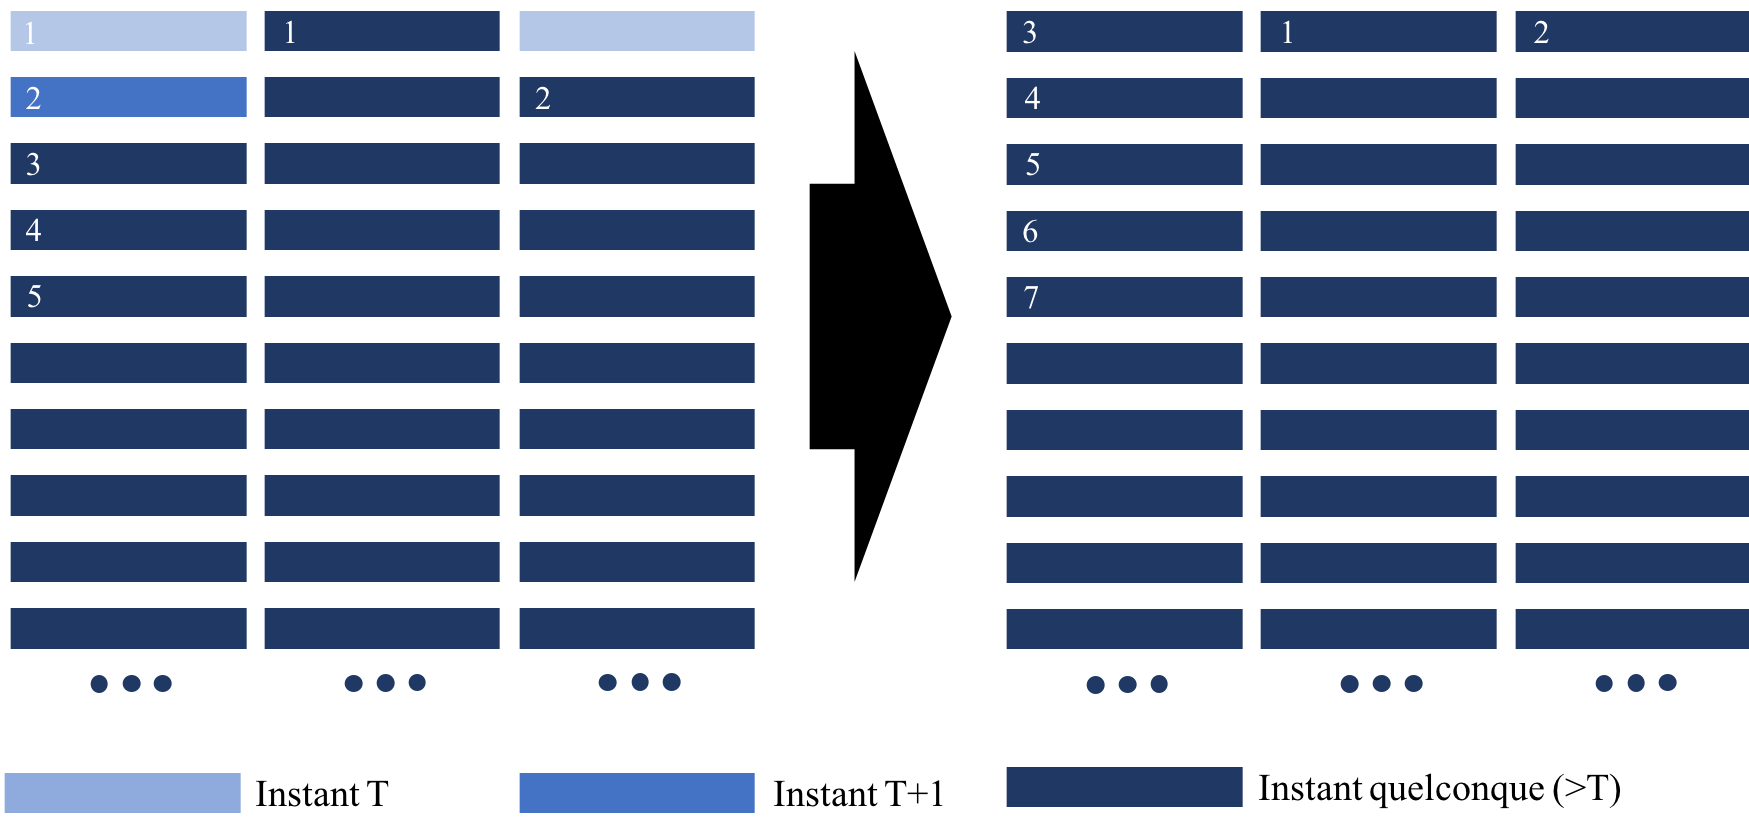

$T2.$ On a donc deux scénarios possibles après suppression d'un cycle directement suppressible :

- Il n'existe pas de cycle composé des sommets des piles (directement suppressible). Dans toutes les piles, les deux instants des deux premiers éléments ne sont pas consécutifs ou les sommets de chaque pile ont des temps différents. L'algorithme s'arrête.

- Il existe une pile dont les deux premiers éléments sont consécutifs en temps et tous les sommets de chaque pile sont égaux en temps. Il existe alors un cycle directement suppressible que l'on peut supprimer.

Si on trouve toujours un sommet de la pile qui n'est pas unique, à chaque cycle directement suppressible supprimé, on aura un nouveau cycle directement suppressible à supprimer. L'algorithme ne se termine pas.

$T3.$ En analysant l'algorithme de Wilson, on trouve trois possibilités de boucles infinies possibles (trois conditions `while`). L'algorithme se termine si les trois processus se terminent. On va donc les étudier les uns après les autres pour montrer que tous ces processus se terminent (éventuellement avec probabilité 1).

- La première possibilité est dans la création d'une nouvelle marche aléatoire. 

Pour mettre fin au processus de marche aléatoire, il faut que la marche aléatoire trouve un sommet qui est  atteint par l'arbre couvrant en cours de construction. Montrons que cet événement arrive avec probabilité 1.
On note $G$ le graphe initial et $T_n$ l'arbre couvrant incomplet que l'on a construit à la n-ième itération. On initialise une marche aléatoire en prenant $u$ dans $G\backslash T$. Puis, on choisit une séquence de voisins successifs choisis aléatoirement. On s'arrête s'il on trouve un sommet de $T$.
Ce problème est modélisable par un processus de Markov entre tous les sommets de $G$ qui s'arrête au premier instant où elle atteint $T$. (voire la figure ci-dessous)

<img src="./Chaine.png" />

On peut montrer qu'une chaine récurrente irréductible repasse une infinité de fois par chacun de ses points.
Ici, notre chaîne de Markov est irréductible (une seule classe de communication par définition d'un graphe), non récurrente car s'il on arrive sur un sommet de $T$, la marche s'arrête. On peut donc définir la chaine récurrente irréductible suivante (voire la figure ci-dessous) : 

<img src="./Markov.png" />

Dans cette chaîne ainsi définie, on passe par au moins un sommet de $T$ une infinité de fois. On peut donc dire que, pour le processus précédent, on passe avec probabilité 1 par un sommet de $T$.

Le processus de création de marche aléatoire se termine donc avec probabilité 1.


- La deuxième possibilité de non terminaison est dans l'effacement des cycles de la marche aléatoire.

On a montré que le processus de création de la marche aléatoire termine. On a donc un nombre fini de sommets dans la marche. A chaque procédure d'effacement d'un cycle, on retire au moins deux sommets à la marche. 

On note $M$ la marche obtenue en sortie du processus de création de marche aléatoire et on note $\lambda = \left\lfloor\dfrac{Card(M)}{2}\right\rfloor$

En notant $M_n$ la marche à l'entrée d'un passage dans la boucle d'effacement de cycle et $M_{n+1}$ cette marche à la sortie de ce passage, on a : $Card(M_{n+1}) \leq Card(M_n)-2$. 

Au bout de $\lambda$ passages dans la boucle, on a donc une marche aléatoire de cardinal inférieur ou égal à 1. Il y'a donc au plus $\lambda$ passages dans la boucle. Le processus d'effacement se termine donc.

De plus, à la dernière étape, l'effacement du dernier cycle laisse une des deux extrémités du cycle dans la marche. La marche aléatoire effacée n'est donc jamais vide.

- La dernière possibilité de non terminaison est la possibilité que l'ajout de marche aléatoire à l'arbre couvrant ne termine jamais.

A chaque passage dans la boucle, la marche aléatoire effacée n'est jamais vide. On rajoute donc toujours au moins un sommet à l'arbre couvrant.

Le graphe ayant un nombre fini de sommets et l'algorithme terminant lorsque l'arbre contient autant de sommets que le graphe initial, on peut dire que l'algorithme se termine en un nombre d'étapes au moins inférieur au cardinal du graphe initial plus un.


Les trois processus se terminent donc, dont un avec probabilité 1. On peut donc conclure que l'algorithme de Wilson se termine avec probabilité 1.

$T4.$ L'arbre couvrant $\vec{T}$ contient tous les sommets du graphe initial. Si on change cet arbre, les cycles intermédiaires $C_1$,...,$C_m$ sont toujours valides : leur extrémité est toujours atteinte par l'arbre (voire la figure ci-dessous).

<img src="./Arbre.png" />

La figure ci-dessus montre bien que tous les cycles possibles auraient pu être effacés dans la construction de n'importe quel garbre couvrant. L'orientation n'a également aucune importance car on peut prendre le cycle dans le sens que l'on veut, on part de toute façon de l'extrémité su cycle pour y revenir ensuite.

Comme on a choisi aléatoirement la marche puis que l'arbre obtenu ne dépend pas de l'ordre de la suppression des cycles ni des cycles supprimés, on a bien choisi un arbre uniformément distribué parmi les arbres couvrants de $G$.

## Partie 2 : Partie simulation

$S1.$ On considère donc un graphe $G$ (ou un arbre) comme une liste de deux éléments : une liste $V$ des éléments de $G$ et une liste $E$ de listes de deux éléments de $V$ (les arcs).

On modélise un graphe $G$ par une liste contenant deux listes:
- Une liste contenant les sommets de $G$
- Une deuxième liste contenant des ensembles de deux sommets pour modéliser les arcs du graphe.

***Exemple***

<img src="./Modelisation.png" />

Le graphe est donné par  $ G=[$$[U_1,U_2,U_3,U_4,U_5]  ,[\left\{U_1,U_2\right\},\left\{U_3,U_2\right\},\left\{U_3,U_4\right\},\left\{U_1,U_4\right\},\left\{U_5,U_2\right\},\left\{U_4,U_5\right\},\left\{U_1,U_5\right\} ]$$  ] $


On importera également des bibliothèques qui seront utiles, en particulier la bibliothèque `random` qui simulera les choix aléatoires.

***Exemple*** : L'arbre suivant est modélisé par :

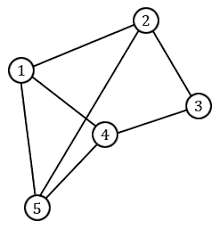

Le graphe est donné par  $ G=[$$[1,2,3,4,5]  ,[\{1,2\},\{2,3\},\{3,4\},\{1,4\},\{5,2\},\{4,5\},\{1,5\} ]$$  ] $

On commence par créer la fonction `Voisins(G,T,n)` qui prend en argument un graphe $G$, un arbre couvrant éventuellement incomplet $T$ et un sommet $n$ de $G$ et $T$, et qui renvoie la liste des sommets voisins du somment $n$ dans $G$ qui n'appartiennent pas à $T$.

In [1]:
def voisins(sommet,G):
    
    ''' La fonction prend un sommet et un graphe G en paramètres et renvoie une liste contenant tous les voisins du sommet'''
    
    voisins=[]
    for arc in G[1]:                         # on parcourt les arcs du graphe
        if sommet in arc:                    # si sommet est dans l'arc
            voisins_liste=list(arc-{sommet}) # on transforme le voisin du sommet en liste, arc-{sommet} représente arc privé du sommet
            voisins.append(voisins_liste[0])
    return(voisins)                

On teste la fonction sur le sommet 3 du graphe de l'exemple en haut de page

In [2]:
# Test de la fonction voisins
G=[['𝑈1','𝑈2','𝑈3','𝑈4','𝑈5'],[{'𝑈1','𝑈2'},{'𝑈3','𝑈2'},{'𝑈3','𝑈4'},{'𝑈1','𝑈4'},{'𝑈5','𝑈2'},{'𝑈4','U5'},{'𝑈1','𝑈5'}]]
sommet='𝑈3'
voisins(sommet,G)

['𝑈2', '𝑈4']

Etant donné un arbre $ T_{i-1} $ inclu dans $G$ et un sommet $u$ n'appartenant pas à $ T_{i-1} $, on générera une marche aléatoire $\left\{U_0,U_1,...,U_N\right\}$   sur $G$ partant de $u$, avec probabilités de transition du sommet
$k$ vers le sommet $l$ donnée par $P_k= \frac{1}{d_k} $ où $d_k$ est le nombre de voisins de $k$ dans $ G $ issue de
$U_0 = u$, et arrêtée au premier instant $N$ auquel elle atteint l’un des sommets de $ T_{i-1} $.

In [3]:
from random import randint
import numpy.random as npr
import numpy as np 

def marche_aléa(G,T,u):
    
    ''' La fonction prend en paramètres un arbre T contenu dans un graphe G (le (i-1)ème graphe dans la récurrence ) 
        et un sommet u n'appartenant pas à T et renvoie une liste contenant une marche aléatoire 
        à partir du sommet u jusqu'à atteindre un sommet appartenant à T'''
    
    liste_sommets=[u] # contiendra U_0 , U_1 , U_2 ... , U_N
    nouveau_som=u     # définit le sommet à ajouter à chaque itération(U_k à la kième itération)
    
    while not(nouveau_som in T[0]):                                          # tant qu' aucun sommet de T n'appartient à la liste_sommets  (1ère condition while)
        voisin=voisins(nouveau_som,G)                                        # liste des voisins du nouveau_som
        indice_nouveau_som=randint(0,len(voisin)-1)   # génére l'indice d'un sommet aléatoire parmi les voisins avec proba par défaut 1/nombre de voisins 
        nouveau_som=voisin[indice_nouveau_som]                                     # sommet aléatoire parmi les voisins
        liste_sommets.append(nouveau_som)                                          # ajout du nouveau sommet
    return(liste_sommets)  

In [4]:
# Test de la fonction marche_aléa
G=[['𝑈1','𝑈2','𝑈3','𝑈4','𝑈5'],[{'𝑈1','𝑈2'},{'𝑈3','𝑈2'},{'𝑈3','𝑈4'},{'𝑈1','𝑈4'},{'𝑈5','𝑈2'},{'𝑈4','U5'},{'𝑈1','𝑈5'}]]
u='𝑈3'
T=[['U1','U5'],[{'U1','U5'}]]
marche_aléa(G,T,u)

['𝑈3', '𝑈4', '𝑈1', '𝑈4', '𝑈1', '𝑈5', '𝑈1', '𝑈4', 'U5']

On va maintenant créer une fonction de complexité temporelle ***linéaire*** $ O(n)$ qui trouve l'entier $n$ et l'entier $s$ qui vérifient cette propriété :

$$ n=inf\left\{ t\in \left\{1,2,...,N\right\}, \exists s<t, U_s=U_t\right\} $$

Ensuite on codera une fonction qui  efface la boucle $U_s, . . . ,U_{n−1} $ pour conserver uniquement $U_0, . . . ,U_{s−1},U_n, . . . ,U_N$

On crée un dictionnaire dont les clés sont $ 0, 1,...,p $ et les valeurs sont des listes contenant les indices des deux premières occurences des $U_k$ dans la liste de la marche aléatoire (s'il y deux sinon la valeur sera l'unique indice) . 

***Exemple***

Pour une marche aléatoire donnée par $[U_2,U_5,U_3,U_5,U_2,U_5,U_4 ] $, on lui associe la liste : $[0,1,2,1,0,1,3 ] $.
Puis, à cette liste, on associe le dictionnaire

$$ \left\{ 0:[0,4], 1:[1,3], 2:[2] , 3:[6]\right\}. $$ 

Notez bien que pour $1$ qui correspond à $U_5$, on ne compte que les deux premières occurences.

Après, en notant $i_{kmax}   $ = le plus grand indice correspondant à $ U_k$ dans le dictionnaire, on cherche facilement :

$$n=min\left\{ i_k \right\}=inf\left\{ t\in \left\{1,2,...,N\right\}, \exists s<t, U_s=U_t\right\}$$ 

et $s$ sera l'autre élément qui appartient à la même liste que $n$. 

In [5]:
def determine_n_s(marche):
    
    ''' Prend en paramètres une liste marche [U_0,U_1,...,U_N] et renvoie  
    les indices n et s correspondant '''
    
    dictionnaire={}
    
    for ind_sommet,sommet in enumerate(marche):    # on itère sur les éléments {(0,U_0),(1,U_1),..,(N,U_N)}, ind_sommet correspond à l'indice du sommet
        if sommet in dictionnaire.keys() and len(dictionnaire[sommet])==1: # Si c'est la deuxième occurence du sommet
            dictionnaire[sommet].append(ind_sommet)  # on ajoute l'indice de la deuxième occurence
        if not(sommet in dictionnaire.keys()):       # si c'est la première occurence
            dictionnaire[sommet]=[ind_sommet]        # on crée la liste qui contiendra les indices des occurences du sommet
    
  
    
    # recherche de n et s avec la méthode usuelle du recherche d'un minimum
    
    booleen=False                         # ce booléen  indiquera s'il existe des sommets qui se répétent dans la liste
    n,s=len(marche),0                     # initialisation de n et s
    
    for liste in dictionnaire.values():                  # on parcourt les valeurs du dictionnaire
        if len(liste)==2:                 # si le sommet a deux occurences dans la marche aléatoire
            booleen=True                  # on a trouvé un sommet qui se répète
            ik=max(liste)                 # correspond au plus grand des deux indices dans la liste(voir i_k dans la description en haut)
            if ik<n: n,s=ik,min(liste)    # si on trouve i_k qui vérifie i_k<n, on affecte i_k à n et s sera l'élement restant dans la liste
    if booleen : return (n,s)             # Si booleen =false le résultat sera none

In [6]:
# Test de la fonction determine_n_s
G=[['𝑈1','𝑈2','𝑈3','𝑈4','𝑈5'],[{'𝑈1','𝑈2'},{'𝑈3','𝑈2'},{'𝑈3','𝑈4'},{'𝑈1','𝑈4'},{'𝑈5','𝑈2'},{'𝑈4','U5'},{'𝑈1','𝑈5'}]]
u='𝑈3'
T=[['U1','U5'],[{'U1','U5'}]]
marche=marche_aléa(G,T,u)
print("la marche aléatoire générée est : ",marche)
print('n,s=',determine_n_s(marche))


la marche aléatoire générée est :  ['𝑈3', '𝑈4', 'U5']
n,s= None


La fonction suivante `effacer` la boucle $U_s, . . . ,U_{n−1} $ pour conserver uniquement $U_0, . . . ,U_{s−1},U_n, . . . ,U_N$
et itère cette procédure jusqu'à l'effacement de telles boucles

In [7]:
def effacer(marche):
    
    '''Prend en paramètres les indices n et s et une matche aléatoire [𝑈0,𝑈1,...,𝑈𝑁] et efface 𝑈𝑠,...,𝑈𝑛−1 et le répète 
    pour faire disparaître ce type de boucles'''
    
    n_s= determine_n_s(marche)        # contient le couple (n,s) s'il existe et None sinon 
    while(n_s!=None):                 # tant que des boucles 𝑈𝑠,...,𝑈𝑛−1 existent  (2ème condition while)
        n,s=n_s[0],n_s[1]             # dépaquetage du couple
        del marche[s:n]               # efface 𝑈𝑠,...,𝑈𝑛−1
        n_s= determine_n_s(marche)
    return(marche)

In [8]:
# Test de la fonction effacer
marche= ['U3', 'U2', 'U3', 'U4', 'U5']
effacer(marche)

['U3', 'U4', 'U5']

Pour un graphe $G = (sommets, arcs)$, un arbre couvrant de G est un graphe arbre $T = (sommets_T, arcs_T)$ , tel que $sommets=sommets_T$ et $arcs_T ⊂ arcs$, $Card(arcs_T)=Card(sommets)-1 $  

On implémente ensuite la fonction wilson qui  générera la récurrence sur le graphe pour obtenir un arbre couvrant uniforme

In [9]:
def wilson(G):
    
    ''' prend en paramètre un graphe G et renvoie un arbre couvrant de G généré de manière aléatoire uniforme'''
    
    T=[[G[0][randint(0,len(G[0])-1)]],[]]              # initialisation de l'arbre T avec un sommet tiré de manière aléatoire
    
    ## Récurrence
    
    while len(T[0])!=len(G[0]):                            # tant que T n'est pas un arbre couvrant (3ème condition while)
        
        G_privé_de_T=list(set(G[0])-set(T[0]))             # les sommets de G n'appartenant pas à T
        u= G_privé_de_T [randint(0,len(G_privé_de_T)-1)]   # choix aléatoire d'un sommet u n appartenant pas aux sommets de T=T_{i-1}
        marche=marche_aléa(G,T,u)
        marche_effacé=effacer(marche)                      #marche aléatoire après l'effacement de 𝑈𝑠,...,𝑈𝑛−1
        T[0]=T[0]+marche_effacé[:-1]                       # on ajoute à T les nouveaux sommets
        T[1]=T[1]+[{marche_effacé[ind],marche_effacé[ind+1]} for ind in range(len(marche_effacé)-1)] # on ajoute à la liste des arcs de T les nouveaux arcs
    
    return(T)    
        

En réalité, les sommets sont des couples de coordonnées  dans un plan cartésien. 
Dans ce qui suit on optera pour cette représentation des sommets.

In [10]:
# Test de la fonction wilson
G=[[(1,2),(2,3),(3,4),(4,2),(5,6)],[{(1,2),(2,3)},{(2,3),(3,4)},{(3,4),(4,2)},{(1,2),(4,2)},{(5,6),(2,3)},{(4,2),(5,6)},{(1,2),(5,6)}]]
wilson(G)

[[(4, 2), (3, 4), (2, 3), (5, 6), (1, 2)],
 [{(2, 3), (3, 4)}, {(2, 3), (5, 6)}, {(1, 2), (5, 6)}, {(1, 2), (4, 2)}]]

Après avoir implémenté l'algorithme de Wilson, on le teste sur différents types de graphes : les grilles et les triangles. On en donne une représentation graphique qui présente l'arbre couvrant le graphe de référence.

In [11]:
def Grille(n):
    V = []   # V contiendra les sommets de la grille
    E = []   # E contiendra les arcs de la grille
    for j in range(n) :
        V += [ (i,j) for i in range(n) ]
        E += [ {(i,j),(i+1,j)} for i in range(n-1)]  
        E += [ {(j,i),(j,i+1)} for i in range(n-1)]
    return([V,E])

In [12]:
import matplotlib.pyplot as plt

def afficher_grille(longueur_grille,W,couleur='red'):
    # On utilise une boucle pour afficher des segments car la fonction
    for i in range(longueur_grille):
        plt.hlines(y=i,xmin=0,xmax=longueur_grille-1,colors='k',linestyles=':')
        plt.vlines(x=i,ymin=0,ymax=longueur_grille-1,colors='k',linestyles=':')
        
    # On trace la grille de G en pointillés noirs
    for arc in W[1]:
        arc=list(arc)
        x1 = [ arc[0][0],arc[1][0] ]
        y1 = [ arc[0][1],arc[1][1] ]
        plt.plot(x1, y1, c=couleur)
        
    plt.axis("equal")
    plt.tight_layout()
    plt.show()
    

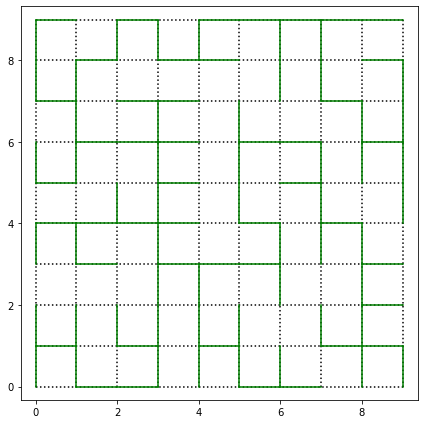

In [27]:
plt.figure(figsize=(6,6))
n=10
G = Grille(n)
W = wilson(G)
afficher_grille(n,W,'green')

In [26]:
import time 
t = time .time ()
n=50
W = wilson(G)
time.time()-t

5.132777690887451

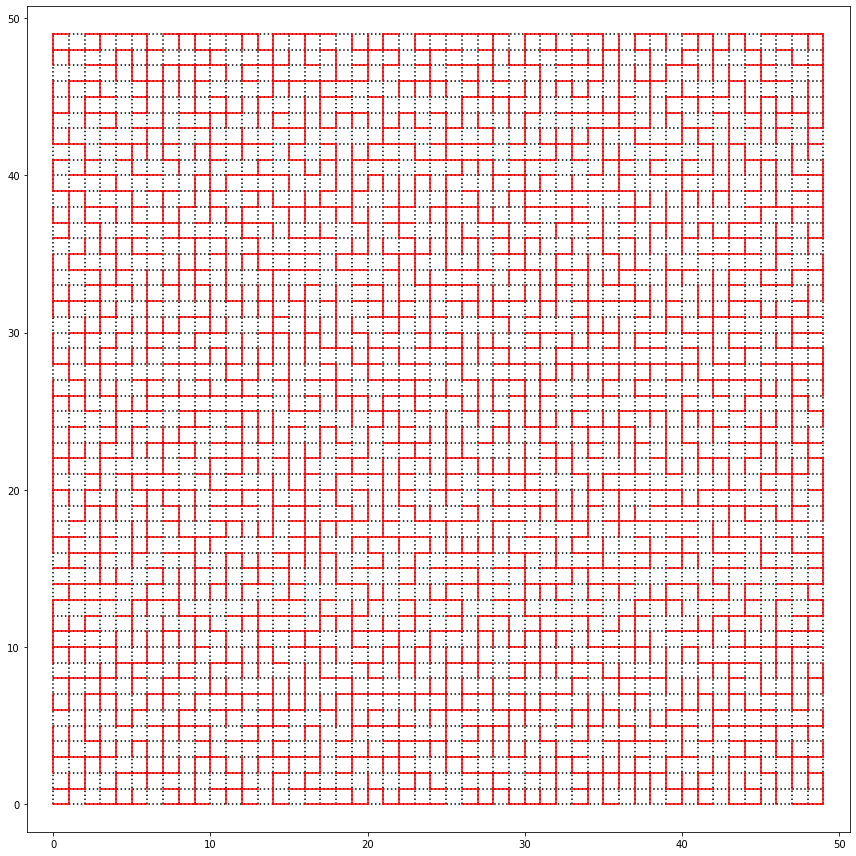

In [14]:
plt.figure(figsize=(12,12))
n=50
G = Grille(50)
W = wilson(G)
afficher_grille(50,W)

In [15]:
def Triangle(n):
    V = []   # V contiendra les sommets de la grille
    E = []   # E contiendra les arcs de la grille
    for i in range(1,n+1) :
        V += [ (i,j) for j in range(1,i+1) ]
    for i in range(n) :
        for j in range(1,i+1) :
            E += [ {(i+1,j),(i+1,j+1)} ]
            E += [ {(i,j),(i+1,j)} ]
            E += [ {(i,j),(i+1,j+1)} ]
    return([V,E])

In [16]:
def afficher_triangle(longueur_grille,W,couleur='red'):
    # On utilise une boucle pour afficher des segments car la fonction
    # plt.plot trace des courbes continue
    for i in range(longueur_grille):
        plt.hlines(y=i+1,xmin=i+1,xmax=longueur_grille,colors='k',linestyles=':')
        plt.vlines(x=i+1,ymin=1,ymax=i+1,colors='k',linestyles=':')
        plt.plot(range(i+1,longueur_grille+1),range(1,longueur_grille+1-i),'k:')    
    # On trace la grille de G en pointillés noirs
    
    for arc in W[1]:
        arc=list(arc)
        x1 = [ arc[0][0],arc[1][0] ]
        y1 = [ arc[0][1],arc[1][1] ]
        plt.plot(x1, y1, c=couleur)
        
        
    plt.axis("equal")
    plt.tight_layout()
    plt.show()
    

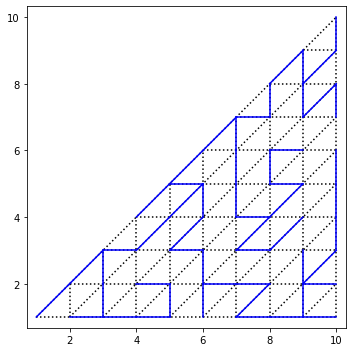

In [17]:
plt.figure(figsize=(5,5))
n=10
G = Triangle(n)
W = wilson(G)
afficher_triangle(n,W,'blue')

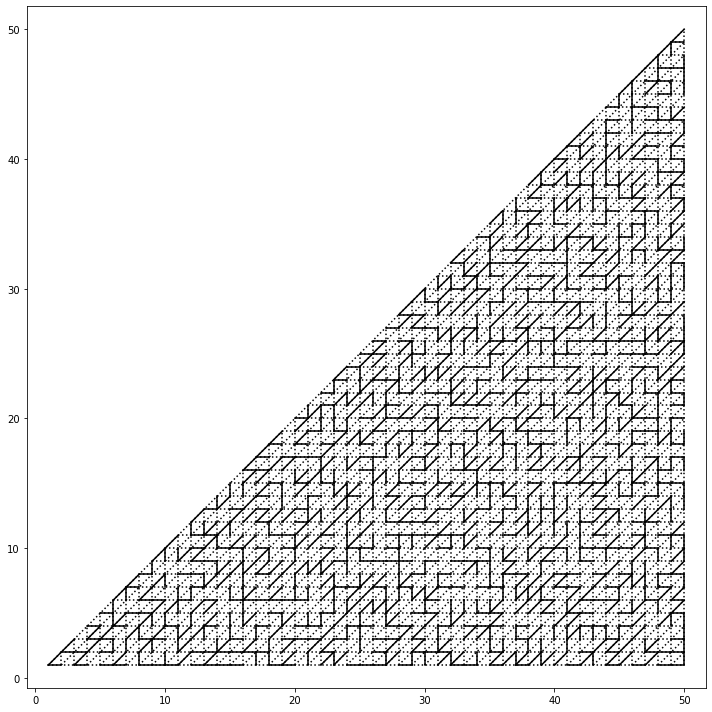

In [18]:
plt.figure(figsize=(10,10))
n=50
G = Triangle(n)
W = wilson(G)
afficher_triangle(n,W,'black')

Nous avons également trouvé intéressant de tester la complexité de nos programmes en traçant leur temps d'éxecution en fonction de la taille du graphe initial. On peut déjà remarquer que le graphe initial change la complexité : les algorithmes traitant des grilles sont plus longs que ceux traitant les triangles. La complexité en elle même est trop aléatoire pour qu'un modèle soit réaliste, cependant, une complexité exponentielle ou en puissance est plausible.

La relative faible complexité et le temps d'exécution des programmes qui ne se compte pas en dizaines de minutes ont été difficiles à obtenir. La complexité obtenue ici nous semble satisfaisante étant donné la complexité du problème et la présence de boucles presqu'infinies (dont le nombre d'éxecution n'est pas majoré) comme lors de la création d'une marche aléatoire.

In [32]:
import time
def complexité_triangle(n_max):
    x=[]
    for i in range(1,n_max,5):
        t0=time.perf_counter()
        G = Triangle(i)
        W = wilson(G)
        t1=time.perf_counter()
        x.append(t1-t0)
    plt.plot(range(1,n_max,5),x,'r',label=r"Temporel complextiy on Triangular grid")
    plt.xlabel("points number")
    plt.ylabel(r"run time $(s)$")
    plt.legend(loc='best')
    plt.show()

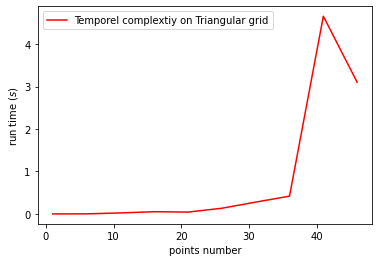

In [33]:
n_max=50
complexité_triangle(n_max)

In [34]:
def complexité_grille(n_max):
    x=[]
    for i in range(1,n_max,5):
        t0=time.perf_counter()
        G = Grille(i)
        W = wilson(G)
        t1=time.perf_counter()
        x.append(t1-t0)
    plt.plot(range(1,n_max,5),x,'r',label=r"Temporel complextiy on rectangular grid")
    plt.xlabel("points number")
    plt.ylabel(r"execution time")
    plt.legend(loc='best')
    plt.show()

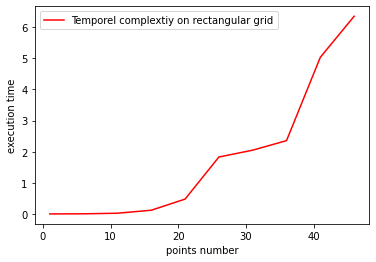

In [35]:
n_max=50
complexité_grille(n_max)
